## LOGISTIC REGRESSION MODEL THAT PREDICTS WHETHER PEOPLE WILL TAKE h1n1 VACCINE OR NOT

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
df=pd.read_csv('vaccine.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
#Dimension of the dataset
df.shape

(26707, 34)

In [4]:
#Statistical information on each column
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [5]:
#Checking for the no of columns and their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

### Preprocessing the Dataset

In [6]:
# checking for null values
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
#Removing all rows having null values
data=df.dropna()
data.isnull().sum()
data.shape

(11794, 34)

In [8]:
#Checking for duplicated rows
data.duplicated().sum()

0

In [9]:
#checking for categorical features and their unique values
for column in data.columns:
    if data[column].dtype == 'object':
        print('Unique values in', column, 'are', data[column].unique())

Unique values in age_bracket are ['55 - 64 Years' '35 - 44 Years' '45 - 54 Years' '65+ Years'
 '18 - 34 Years']
Unique values in qualification are ['< 12 Years' '12 Years' 'Some College' 'College Graduate']
Unique values in race are ['White' 'Black' 'Hispanic' 'Other or Multiple']
Unique values in sex are ['Female' 'Male']
Unique values in income_level are ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
Unique values in marital_status are ['Not Married' 'Married']
Unique values in housing_status are ['Own' 'Rent']
Unique values in employment are ['Not in Labor Force' 'Employed' 'Unemployed']
Unique values in census_msa are ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [10]:
#Turning String data into numerical
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.columns:
    if data[column].dtype=='object':
        le=LabelEncoder()
        data[column]=le.fit_transform(data[column])
        label_encoders[column]=le

## EDA

Text(0.5, 1.0, 'Awarness of flu among the population')

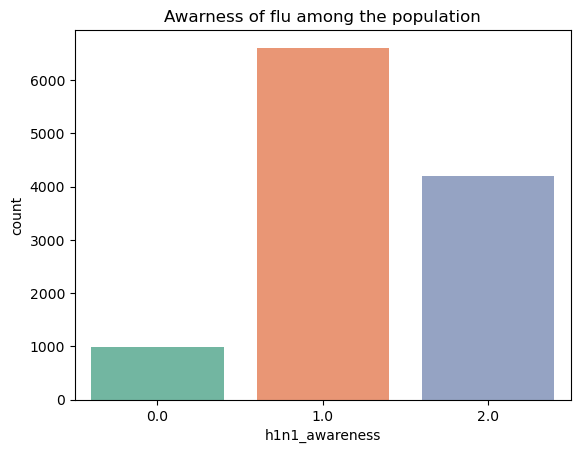

In [11]:
# Checking how aware are the people about the flu
sns.countplot(x='h1n1_awareness', data=data, palette='Set2')
plt.title('Awarness of flu among the population')

We see that most people are fairly aware of the flu

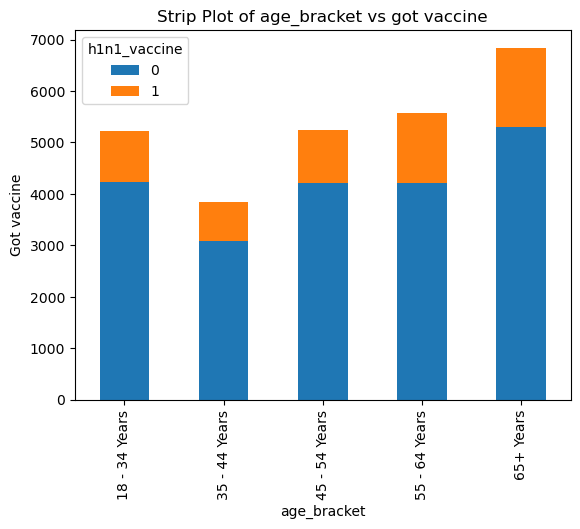

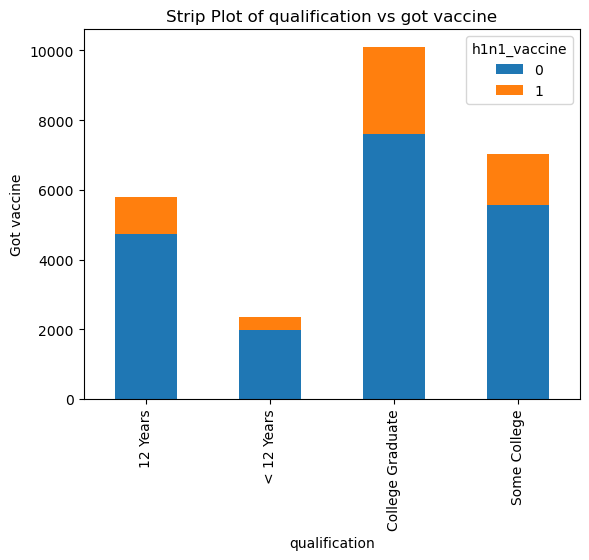

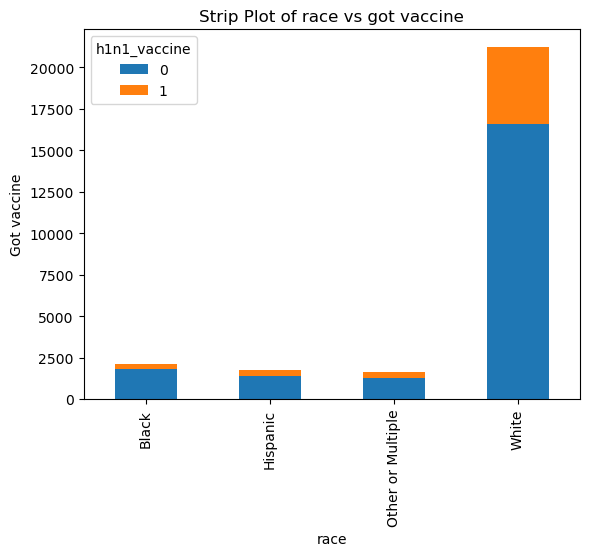

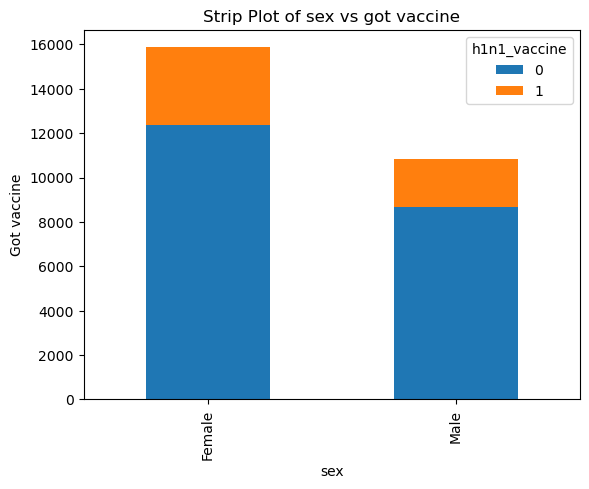

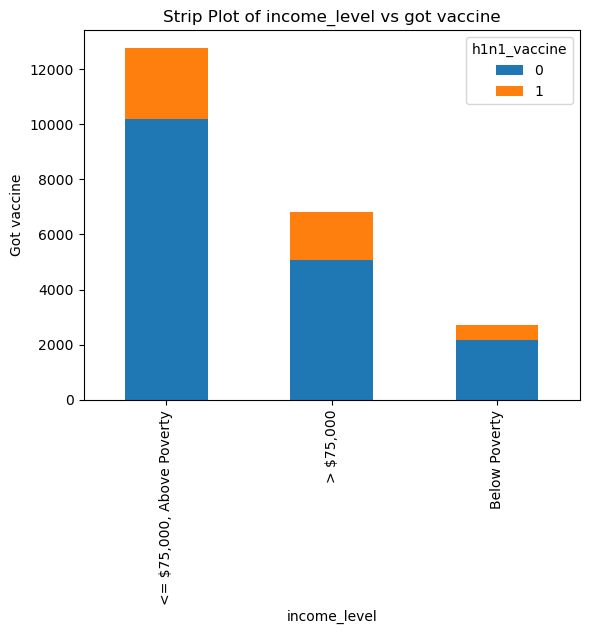

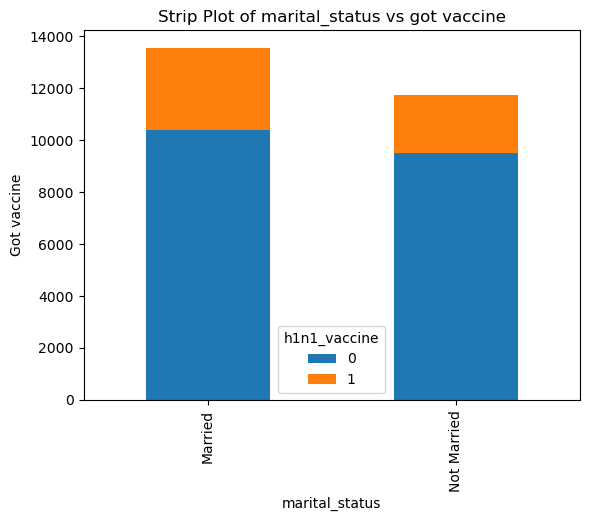

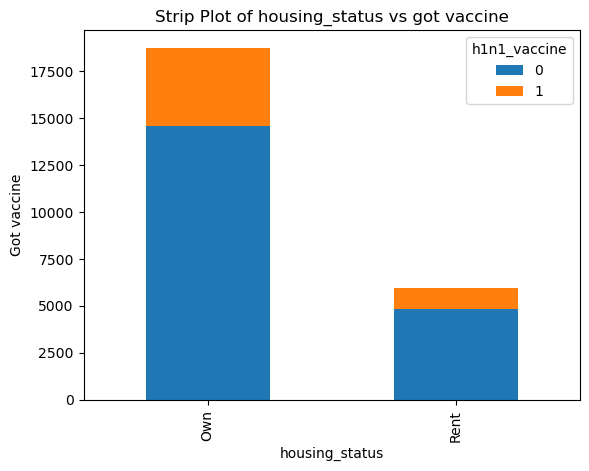

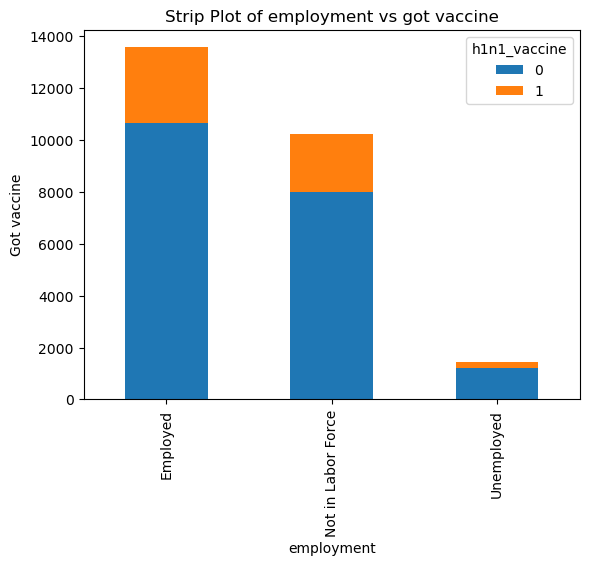

In [12]:
#checking for relation between categorical columns and the target
df_cat=df.select_dtypes(include=['object'])
for i, column in enumerate(df_cat.columns[:-1]):  
    crosstab = pd.crosstab(df[column], df['h1n1_vaccine'])
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Strip Plot of {column} vs got vaccine')
    plt.xlabel(column)
    plt.ylabel('Got vaccine')

From the graphs we can see that the categorical columns dont have much correlation with the target

### Feature Selection

In [13]:
#Displaying the correlation matrix
corr_matrix=data.corr()
corr_matrix

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.008851,0.002846,-0.004411,0.011435,-0.023707,0.013223,-0.007789,0.000982,-0.001730,...,0.000733,0.014391,-0.011066,-0.007591,-0.004342,-0.016474,-0.001686,0.000296,-0.007470,-0.009571
h1n1_worry,0.008851,1.000000,0.049069,0.108410,0.236030,0.162254,0.290278,0.244147,0.236272,0.244723,...,-0.144386,-0.141845,0.058079,-0.030966,0.004326,0.065511,-0.000544,-0.020616,0.043802,0.188165
h1n1_awareness,0.002846,0.049069,1.000000,-0.010008,0.071650,0.039293,0.081308,-0.048993,-0.072884,0.072293,...,0.163936,-0.089590,-0.050974,-0.119251,-0.123599,-0.128476,-0.054392,0.008401,0.053219,0.160849
antiviral_medication,-0.004411,0.108410,-0.010008,1.000000,0.052989,0.144986,0.060007,0.108812,0.119786,0.060948,...,-0.122444,-0.011682,0.071676,0.031910,0.076920,0.001983,0.018065,0.038442,0.071167,0.021498
contact_avoidance,0.011435,0.236030,0.071650,0.052989,1.000000,0.074952,0.347909,0.230588,0.219110,0.337257,...,-0.014792,-0.124971,0.005318,-0.048907,-0.036559,0.028412,-0.023228,0.011255,0.027918,0.060933
bought_face_mask,-0.023707,0.162254,0.039293,0.144986,0.074952,1.000000,0.081524,0.184630,0.169308,0.110183,...,-0.082950,-0.054416,0.051185,0.011680,0.054627,0.030397,0.000575,0.025375,-0.006144,0.073868
wash_hands_frequently,0.013223,0.290278,0.081308,0.060007,0.347909,0.081524,1.000000,0.183973,0.186460,0.366908,...,-0.075016,-0.170723,0.018600,-0.044630,-0.023153,0.004089,-0.005504,0.009053,0.039936,0.097192
avoid_large_gatherings,-0.007789,0.244147,-0.048993,0.108812,0.230588,0.184630,0.183973,1.000000,0.578556,0.245413,...,-0.124221,-0.057241,0.030323,0.031041,0.055030,0.136772,0.050071,-0.032486,-0.010547,0.036809
reduced_outside_home_cont,0.000982,0.236272,-0.072884,0.119786,0.219110,0.169308,0.186460,0.578556,1.000000,0.272950,...,-0.141972,-0.049388,0.054119,0.032406,0.065664,0.141606,0.032295,-0.024569,-0.017698,0.030403
avoid_touch_face,-0.001730,0.244723,0.072293,0.060948,0.337257,0.110183,0.366908,0.245413,0.272950,1.000000,...,-0.059515,-0.183377,0.000862,-0.037936,-0.026310,0.024523,0.015164,-0.001617,0.016705,0.079728


In [14]:
#Removing columns whose correlation with target are less than 0.05
corr_with_target=corr_matrix['h1n1_vaccine']
columns_to_remove = corr_with_target[abs(corr_with_target) <= 0.08].index
print('columns to be removed : ',columns_to_remove.tolist())
data = data.drop(columns=columns_to_remove)
print("Features selected:")
print(data.columns)

columns to be removed :  ['unique_id', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face', 'cont_child_undr_6_mnths', 'sick_from_seas_vacc', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa', 'no_of_adults', 'no_of_children']
Features selected:
Index(['h1n1_worry', 'h1n1_awareness', 'wash_hands_frequently',
       'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'age_bracket', 'h1n1_vaccine'],
      dtype='object')


### Creating the training and testing data

In [15]:
from sklearn.model_selection import train_test_split
X=data.drop(['h1n1_vaccine'],axis=1)
y=data[['h1n1_vaccine']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training the model

In [16]:
# Creating a logistic regression model with RFECV(Regressive Feature Elimination with Cross Validation) and training it
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
lg=LogisticRegression()
cv=StratifiedKFold(5)
rfecv=RFECV(estimator=lg,step=1,cv=cv,scoring='accuracy',min_features_to_select=1,n_jobs=2)
rfecv.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), n_jobs=2, scoring='accuracy')

### Evaluating the Model

In [17]:
# Testing the model
y_pred=rfecv.predict(X_test)

In [18]:
# Getting a classification report of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=['did not take vaccine','took vacine']))

                      precision    recall  f1-score   support

did not take vaccine       0.83      0.91      0.87      2488
         took vacine       0.73      0.57      0.64      1051

            accuracy                           0.81      3539
           macro avg       0.78      0.74      0.76      3539
        weighted avg       0.80      0.81      0.80      3539



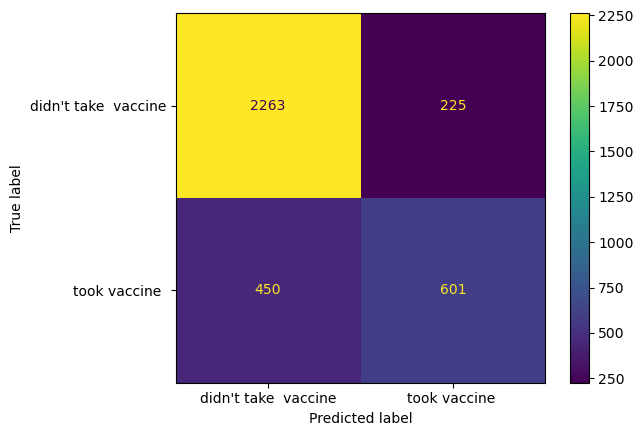

In [19]:
# creating a confusion matrix for the model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["didn't take  vaccine", 'took vaccine '])
disp.plot()

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

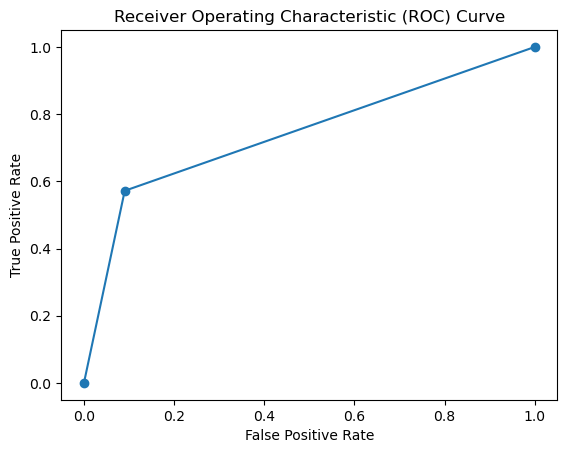

In [20]:
# Creating a Roc curve of the model
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

From the evaluations we have made we can see that the model is moderately effective in classification